In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.optimize import minimize
from Gammit_Estimator import Gammit_Estimator
from scipy.stats import gaussian_kde


In [14]:
true_alpha = np.array([3,0.8])
true_beta = 1.2
true_effect = true_alpha[1]*true_beta
def create_data(n= 10_000):
    x = np.column_stack([np.ones(n), np.random.random(n) >= 0.7])  
    T = 6
    y = np.minimum(np.random.gamma(x @ true_alpha, true_beta),T)
    #y = np.maximum(np.minimum(np.random.normal(3+x[:,1]*0.96, 1),T),0)
    return x,y,T

x,y,T = create_data()

model = Gammit_Estimator().import_data(x,y,T)
print("We will run an estimate on the data:")
print("Mean effect:",model.estimate_mean_effect(n_points = 6,form = "gamma"))

print("Standard error of estimate",model.compute_standard_error())

We will run an estimate on the data:
Mean effect: 0.9978566247827277
Standard error of estimate 0.04623211156641582


In [15]:
n_iters = 100
gammit_estimates = np.zeros(n_iters)
tobit_estimates = np.zeros(n_iters)
uncensored_estimates = np.zeros(n_iters)
ols_estimates = np.zeros(n_iters)
gammit_estimator = Gammit_Estimator()
for i in range(n_iters):
    print(f"\r{int(i/n_iters*100)}% completed.",end = "")
    x,y,T = create_data()
    ols_estimates[i] = np.linalg.solve(x.T@x,x.T@y)[1]

    gammit_estimator.import_data(x,y,T)
    gammit_estimates[i] = gammit_estimator.estimate_mean_effect(n_points = 6)
    tobit_estimates[i] = gammit_estimator.estimate_mean_effect(n_points = 6,form = "normal")
    gammit_estimator.import_data(x,y,None)
    uncensored_estimates[i] = gammit_estimator.estimate_mean_effect()

print(f"\r100% completed.")


100% completed.


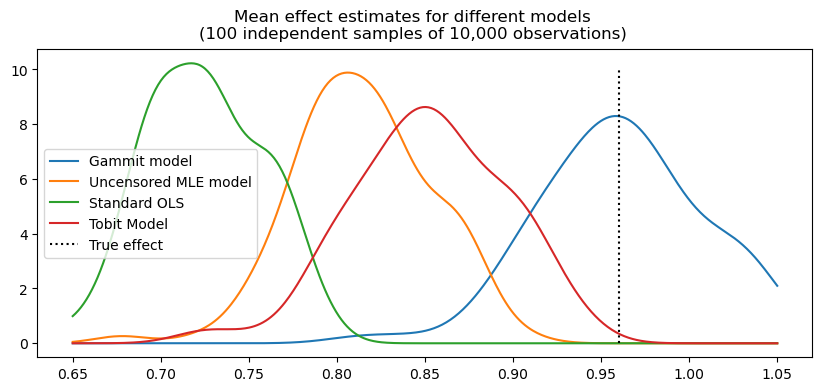

In [16]:
plt.figure(figsize=(10,4))
plt.suptitle("Mean effect estimates for different models\n(100 independent samples of 10,000 observations)")
plotting_points= np.linspace(0.65,1.05,512)
plt.plot(plotting_points,gaussian_kde(gammit_estimates).evaluate(plotting_points),label ="Gammit model")
plt.plot(plotting_points,gaussian_kde(uncensored_estimates).evaluate(plotting_points),label ="Uncensored MLE model")
plt.plot(plotting_points,gaussian_kde(ols_estimates).evaluate(plotting_points),label ="Standard OLS")
plt.plot(plotting_points,gaussian_kde(tobit_estimates).evaluate(plotting_points),label ="Tobit Model")
plt.plot([0.96,0.96],[0,10],"k:",label = "True effect")

plt.legend()
plt.show()

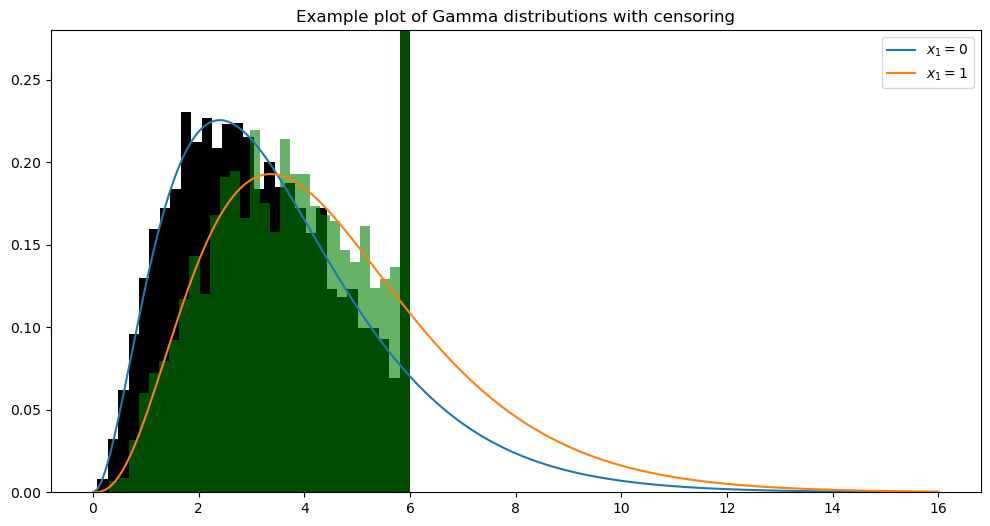

In [17]:
plt.figure(figsize=(12,6))
plt.hist(y[x[:,1]==0],bins = 30,color="k", density = True)
plt.hist(y[x[:,1]==1],bins = 30, color = "g",alpha = 0.6, density = True)
points = np.linspace(0,16,200)
plt.plot(points,gamma.pdf(points,3,loc = 0, scale = 1.2),label = r"$x_1 = 0$")
plt.plot(points,gamma.pdf(points,3.8,loc = 0, scale = 1.2), label = r"$x_1=1$")
plt.ylim(0,0.28)
plt.legend()
plt.title("Example plot of Gamma distributions with censoring")
plt.show()